# 3.简单线性回归

## 3.1 读入数据并查看描述性统计信息

In [6]:
#导入数据包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
#读入并查看数据信息

dtype={'TICKER_SYMBOL':str}  #按规定格式读取某列
df = pd.read_csv("Data/GeneralBusinessIncome.csv",dtype = dtype)

#查看数据描述统计信息
df.describe()

,PARTY_ID,FISCAL_PERIOD,MERGED_FLAG,T_REVENUE,REVENUE,INT_INCOME,PREM_EARNED,COMMIS_INCOME,SPEC_TOR,ATOR,...,BASIC_EPS,DILUTED_EPS,OTH_COMPR_INCOME,OTH_EFFECT_CI,AE_EFFECT_CI,T_COMPR_INCOME,COMPR_INC_ATTR_P,COMPR_INC_ATTR_M_S,OTH_EFFECT_PCI,AE_EFFECT_PCI
count,2.083060e+05,208306.000000,208306.0,2.082760e+05,2.082920e+05,3.920000e+03,3.067000e+03,2.592000e+03,2.900000e+02,3.940000e+02,...,205857.000000,199371.000000,8.366700e+04,2.180000e+02,9.290000e+02,1.960440e+05,1.958490e+05,1.494770e+05,2.440000e+02,7.340000e+02
mean,5.278100e+04,7.720680,1.0,4.711695e+09,4.703335e+09,1.965393e+08,8.859690e+07,2.216378e+08,1.271596e+08,9.033657e+06,...,0.238963,0.235819,-1.613467e+06,-1.168026e+06,-2.288952e+06,2.635528e+08,2.341820e+08,3.848871e+07,2.957094e+07,8.046370e+06
std,5.039279e+05,3.469145,0.0,4.238955e+10,4.237183e+10,1.126002e+09,1.187500e+09,7.298926e+08,5.458719e+08,8.339485e+07,...,0.434032,0.427521,2.995326e+08,1.768439e+07,4.488878e+07,2.098220e+09,1.863942e+09,3.840470e+08,9.872134e+07,9.813054e+07
min,3.000000e+00,3.000000,1.0,-4.451524e+07,-4.451524e+07,-3.695805e+06,-4.289316e+06,-1.426680e+06,-1.249959e+08,-3.058748e+08,...,-21.857000,-21.857000,-2.023900e+10,-2.610000e+08,-6.030421e+08,-1.830261e+10,-1.615278e+10,-4.342121e+09,-6.421470e+04,-3.717582e+08
25%,8.110000e+02,6.000000,1.0,2.659696e+08,2.648917e+08,3.460088e+06,0.000000e+00,1.209186e+05,0.000000e+00,0.000000e+00,...,0.034100,0.032600,-2.292214e+06,0.000000e+00,-1.000000e+02,1.260156e+07,1.207179e+07,-5.643000e+05,0.000000e+00,-1.000000e-02
50%,2.046000e+03,9.000000,1.0,7.115241e+08,7.088636e+08,1.843963e+07,0.000000e+00,2.365199e+06,0.000000e+00,0.000000e+00,...,0.140000,0.136800,-3.894880e+03,0.000000e+00,0.000000e+00,4.932245e+07,4.701986e+07,4.780997e+05,0.000000e+00,0.000000e+00
75%,3.823100e+04,12.000000,1.0,2.080031e+09,2.071813e+09,8.216946e+07,0.000000e+00,5.023606e+07,0.000000e+00,4.054323e+05,...,0.350000,0.344800,1.384593e+06,0.000000e+00,1.000000e+02,1.469795e+08,1.387557e+08,7.877914e+06,0.000000e+00,1.000000e+02
max,1.000700e+07,12.000000,1.0,2.880000e+12,2.880000e+12,2.669900e+10,3.425631e+10,1.053889e+10,3.679698e+09,1.479845e+09,...,21.560000,21.560000,1.388168e+10,6.365475e+06,4.079899e+08,1.530000e+11,1.430000e+11,2.314600e+10,5.013000e+08,1.628118e+09


## 3.2 提取特征值和标签

In [8]:
#特征值：解释变量（自变量）
#标签：因变量

#提取数据并删除缺失值
ConData0 = df[['COGS','REVENUE']]
ConData1 = ConData0.drop(labels = \
                         ConData0.index[ConData0['COGS'].isnull()],axis=0)
ConData = ConData1.drop(labels = \
                        ConData1.index[ConData1['REVENUE'].isnull()],axis=0)

#提取特征值和标签
COGS_X = ConData['COGS']
REVENUE_Y = ConData['REVENUE']

#查看数据集
ConData

,COGS,REVENUE
0,5.404079e+09,8.164319e+09
1,1.704442e+10,2.930837e+10
2,2.748888e+10,4.139035e+10
3,1.030000e+11,1.460000e+11
4,1.030000e+11,1.460000e+11
...,...,...
208301,1.300979e+08,5.291353e+08
208302,2.027395e+08,3.466358e+08
208303,1.812670e+08,3.279914e+08
208304,9.762662e+07,1.872872e+08


## 3.3 可视化营业成本和营业收入之间的关系

In [12]:
import matplotlib.font_manager as font_manager
font_dirs = ['myfonts',]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
print(font_files)

font_list = font_manager.createFontList(font_files)
print(font_list)

font_manager.fontManager.ttflist.extend(font_list)
len(font_manager.fontManager.ttflist)

['/data/nas/workspace/jupyter/aliyun/aliyun1/myfonts/simkai.ttf', '/data/nas/workspace/jupyter/aliyun/aliyun1/myfonts/simsun.ttc', '/data/nas/workspace/jupyter/aliyun/aliyun1/myfonts/5c92ee63e88781553133155.ttf', '/data/nas/workspace/jupyter/aliyun/aliyun1/myfonts/5c92e9d0bc1941553131984.ttf', '/data/nas/workspace/jupyter/aliyun/aliyun1/myfonts/SIMLI.TTF', '/data/nas/workspace/jupyter/aliyun/aliyun1/myfonts/5c8a0711e99921552549649.ttf', '/data/nas/workspace/jupyter/aliyun/aliyun1/myfonts/85965d882f93b69551569206163.ttf', '/data/nas/workspace/jupyter/aliyun/aliyun1/myfonts/SIMYOU.TTF']
[<Font 'KaiTi' (simkai.ttf) normal normal 400 normal>, <Font 'SimSun' (simsun.ttc) normal normal 400 normal>, <Font 'HYChengXingJ' (5c92ee63e88781553133155.ttf) normal normal regular normal>, <Font 'HYBeiWeiXieJing' (5c92e9d0bc1941553131984.ttf) normal normal 400 normal>, <Font 'LiSu' (SIMLI.TTF) normal normal 400 normal>, <Font 'YRDZST' (5c8a0711e99921552549649.ttf) normal normal semibold normal>, <Font 

51

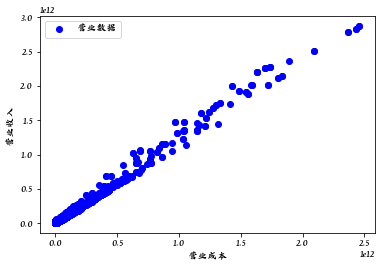

In [15]:
#设置全局字体
plt.rcParams["font.family"] ='HYBeiWeiXieJing'
plt.rcParams['axes.unicode_minus'] = False

#散点图
plt.scatter(COGS_X,REVENUE_Y,color='b',label='营业数据')

#横纵轴标签
plt.legend(loc=2)
plt.xlabel('营业成本')
plt.ylabel('营业收入')
plt.show()

## 3.4 求出变量间相关系数

In [17]:
#变量间的相关系数
rDf=ConData.corr()
print(rDf)

             COGS   REVENUE
COGS     1.000000  0.996315
REVENUE  0.996315  1.000000


## 3.5 训练集和测试集的划分

In [19]:
# 数据集中分离出训练数据train和测试数据test

from sklearn.model_selection import train_test_split

#建立训练集和测试集数据
train_x,test_x,train_y,test_y = \
train_test_split(COGS_X, REVENUE_Y, train_size=0.8)
#输出训练集和测试集数据大小
print('训练集大小',train_x.shape,train_y.shape)
print('测试集大小',test_x.shape,test_y.shape)

训练集大小 (166388,) (166388,)
测试集大小 (41597,) (41597,)


## 3.6 可视化训练集和测试集的分布

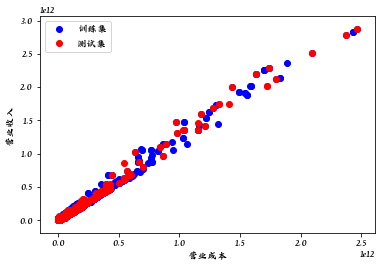

In [21]:
# 绘制散点图，查看训练集和测试集数据的分布情况

#散点图
plt.scatter(train_x,train_y,color='b',label='训练集')
plt.scatter(test_x,test_y,color='r',label='测试集')

#横纵轴标签
plt.legend(loc=2)
plt.xlabel('营业成本')
plt.ylabel('营业收入')
plt.show()

## 3.7 创建线性回归模型

In [29]:
#导入线性回归模型
from sklearn.linear_model import LinearRegression

#创建模型
model=LinearRegression()

## 3.8 训练线性回归模型

In [30]:
#导入模型的数据应为一列数据
train_x=train_x.values.reshape(-1,1)
train_y=train_y.values.reshape(-1,1)
test_x=test_x.values.reshape(-1,1)
test_y=test_y.values.reshape(-1,1)
print('训练集大小:',train_x.shape,train_y.shape)
print('测试集大小:',test_x.shape,test_y.shape)
model.fit(train_x,train_y)

训练集大小: (166388, 1) (166388, 1)
测试集大小: (41597, 1) (41597, 1)


LinearRegression()

## 3.9 显示模型优度

In [31]:
#查看模型得分
print('模型得分为',round(model.score(test_x,test_y),4))

模型得分为 0.9931


## 3.10 求出模型的回归方程

In [32]:
#模型拟合线（模型的回归方程）y=a+bx
a=model.intercept_
b=model.coef_
print('模型的回归方程是:y=%f+%f x'%(a,b))

模型的回归方程是:y=13902937.700657+1.230676 x


## 3.11 绘制模型拟合线

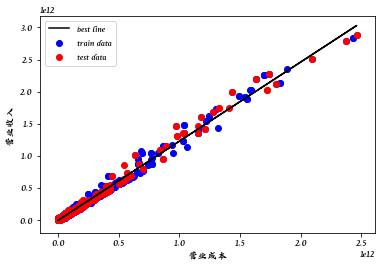

In [33]:
#绘制拟合曲线
plt.scatter(train_x,train_y,color='b',label='train data')
test_y_pred=model.predict(test_x)
plt.plot(test_x,test_y_pred,color='black',label='best line')

#测试集数据的散点图
plt.scatter(test_x,test_y,color='r',label='test data')

#坐标轴
plt.xlabel('营业成本')
plt.ylabel('营业收入')
plt.legend(loc=2)
plt.show()

## 3.12 模型预测

In [13]:
#导入模型的数据应为一列数据
COGS_X = COGS_X.values.reshape(-1,1)
Pre_REVENUE = model.predict(COGS_X)

#将预测数据加入原始数据集对比
ConData['Pre_REVENUE'] = Pre_REVENUE
ConData.head(15)

,COGS,REVENUE,Pre_REVENUE
0,5.404079e+09,8.164319e+09,6.653084e+09
1,1.704442e+10,2.930837e+10,2.093469e+10
2,2.748888e+10,4.139035e+10,3.374907e+10
3,1.030000e+11,1.460000e+11,1.263942e+11
4,1.030000e+11,1.460000e+11,1.263942e+11
5,5.870110e+09,8.894338e+09,7.224861e+09
6,8.600359e+10,1.170000e+11,1.055411e+11
7,2.307595e+07,4.331482e+07,5.109646e+07
8,2.307595e+07,4.331482e+07,5.109646e+07
9,1.474410e+07,2.817939e+07,4.087406e+07
